# Plot the result!

In [1]:
%matplotlib inline
import local_broom

Added 'quench/' and 'quench/libraries' for easy importing.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from monty import Monty

## Plotting functions

In [3]:
# 1D plots

def plot_amp_phase(X, amp, phase, name="amp_phase", xlabel="P1 voltage", save=False):
    """Plot both amplitude and phase of a result."""
    fig, (ax0, ax1) = plt.subplots(nrows = 2, sharex = True)

    ax0.plot(X, amp, ".-", color="steelblue")
    ax1.plot(X, phase, ".-", color="orange")
    
    ax0.set_ylabel("Amplitude")
    ax1.set_ylabel("Phase")
    ax0.set_title(monty.plot_title + "." + name)
    ax1.set_xlabel(xlabel)
    
    ax0.grid()
    ax1.grid()
    fig.align_ylabels([ax0, ax1])
    plt.tight_layout()

    if save:
        monty.savefig(plt, name)

def plot_st_fb(X, st_result):

    fig, ax = plt.subplots()
    
    ax.plot(X, st_result[0])
    ax.set_xlabel("P1 voltage (V)")
    ax.set_ylabel("ST amplitude (a.u.)")
    ax.set_title(monty.plot_title + ".st_history")
    plt.tight_layout()
    
    monty.savefig(plt, "st_history")



In [4]:
# Other functions

def autodb(res):
    """Change a.u. to dB power. Used in the data result."""
    return 10*np.log10(np.abs(res)**2/50*1000)

def autodeg(res):
    """Change a.u. result to phase angle in degrees."""
    return np.unwrap(np.angle(res))  # FIXME: Add axis=?

## Load specific run

In [8]:
# Load completed run
monty = Monty("rf.esr")
print(monty.experiment)

#result = monty.loadrun("hyper_j.29")  # PSB
result = monty.loadrun("freq_sweep.170")  # ESR


params = monty.parameters["parameters"]
data = result["data"]

Loading existing experiment (ignoring given experiment parameters)
Note that no experimental data has been loaded.
Next run will have id 365
{'desc': 'Run ESR frequency sweep to determine qubit frequencies'}
Loading 'C:\Users\LD2007\Documents\Si_CMOS_james\data\rf/esr\freq_sweep.170.xz'


### PSB Plotting

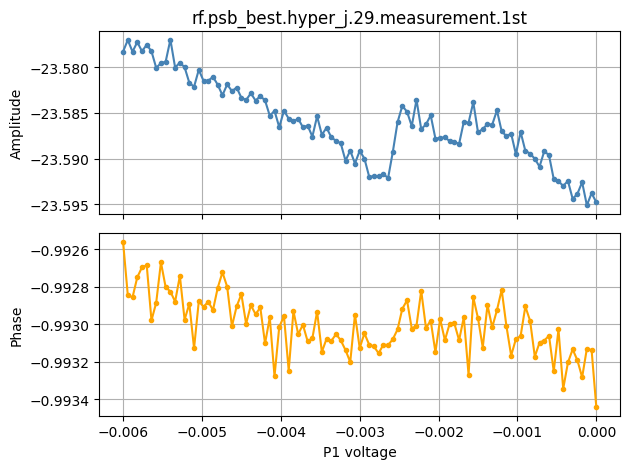

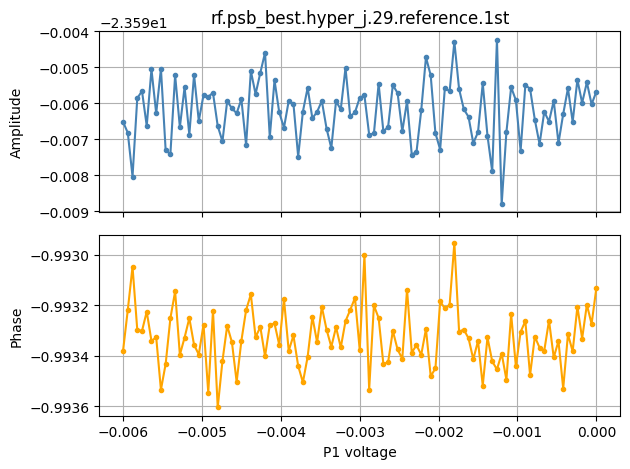

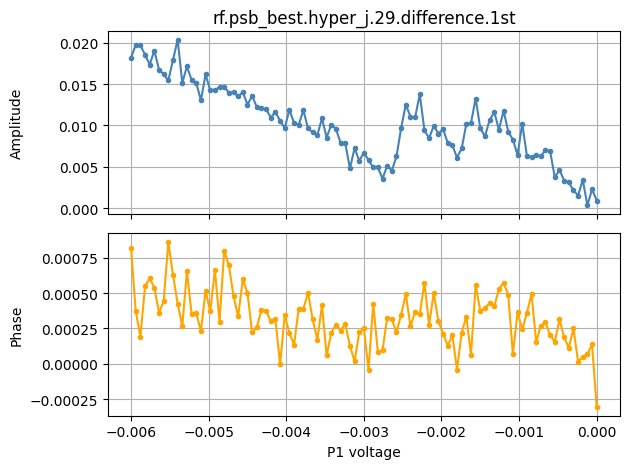

In [6]:
ref = data[:, ::2]
mes = data[:, 1::2]

ref_amp = autodb(ref)
ref_phase = autodeg(ref)
mes_amp = autodb(mes)
mes_phase = autodeg(mes)  # add axis for unwrap?

# X axis (p1_steps)
p1_steps = np.linspace(params["amplitude_volts"]["measure_pulse_start"]["P1"],
                       params["amplitude_volts"]["measure_pulse_end"]["P1"],
                       params["averaging"]["num_detuning"])
X = p1_steps
j_steps = np.linspace(params["amplitude_volts"]["measure_pulse_start"]["J"],
                      params["amplitude_volts"]["measure_pulse_end"]["J"],
                      params["averaging"]["num_j"])



plot_amp_phase(X, mes_amp[0], mes_phase[0],
               name="measurement.1st",
               xlabel="P1 voltage",
               save=True)

plot_amp_phase(X, ref_amp[0], ref_phase[0],
               name="reference.1st",
               xlabel="P1 voltage",
               save=True)

j_run = 0  # which index in j to plot
plot_amp_phase(X, mes_amp[j_run]-ref_amp[j_run], mes_phase[j_run]-ref_phase[j_run],
               name="difference.1st",
               xlabel="P1 voltage",
               save=True)

### ESR Plotting

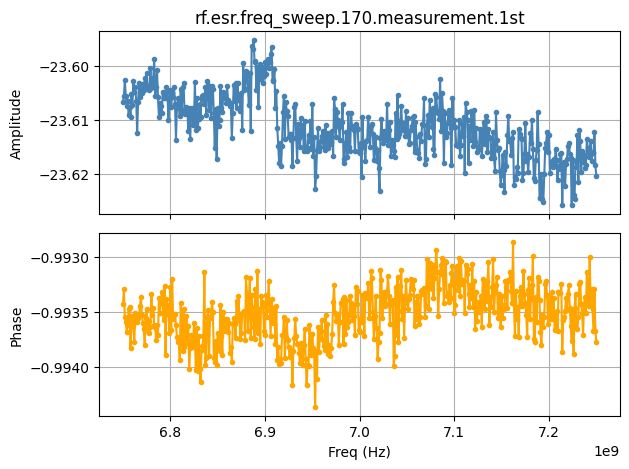

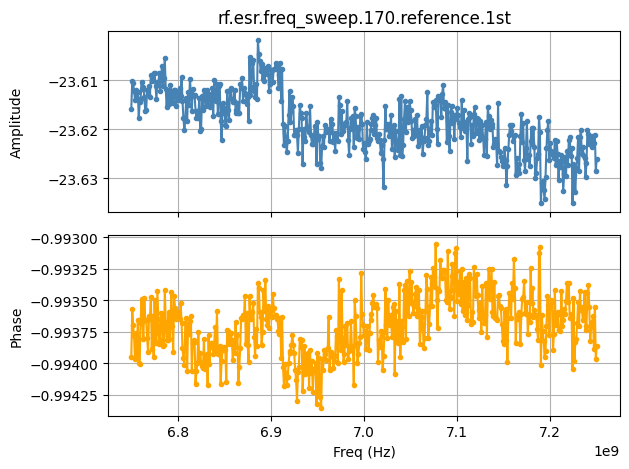

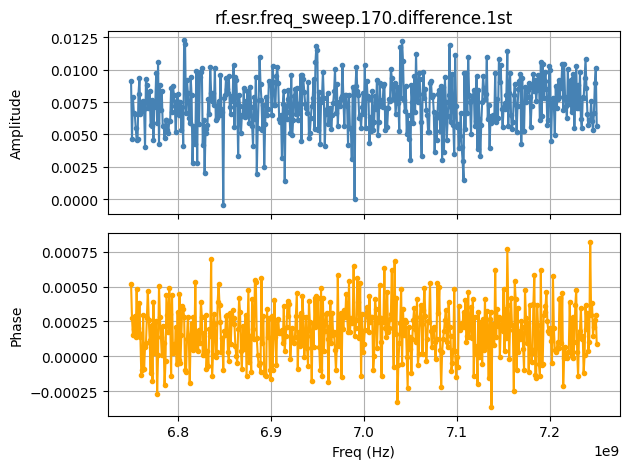

In [10]:
ref = data[:, ::2]
mes = data[:, 1::2]

ref_amp = autodb(ref)
ref_phase = autodeg(ref)
mes_amp = autodb(mes)
mes_phase = autodeg(mes)  # add axis for unwrap?

# X axis (p1_steps)
# freq_steps = np.linspace(params["mw"]["freqs"]["start"],
#                     params["mw"]["freqs"]["stop"],
#                     params["averaging"]["num_freqs"])
freq_steps = np.linspace(params["mw"]["psgfreqstart"],
                    params["mw"]["psgfreqstop"],
                    params["averaging"]["num_freqs"])
X = freq_steps

plot_amp_phase(X, mes_amp, mes_phase,
               name="measurement.1st",
               xlabel="Freq (Hz)",
               save=True)

plot_amp_phase(X, ref_amp, ref_phase,
               name="reference.1st",
               xlabel="Freq (Hz)",
               save=True)

plot_amp_phase(X, mes_amp-ref_amp, mes_phase-ref_phase,
               name="difference.1st",
               xlabel="Freq (Hz)",
               save=True)